<a href="https://colab.research.google.com/github/rayPriyanka1/Research-Through-Data-Science/blob/main/DAY%2010/Day_10_Boosting_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Gradient Boosting Models: Complete Guide
## XGBoost, LightGBM & CatBoost

**Course Instructor:** Md. Samiul Islam

**Dataset:** Real Kaggle Datasets (Iris + Titanic)

**Duration:** 120 minutes

---

## 📋 Table of Contents

1. [Setup & Installation](#setup)
2. [Introduction to Boosting](#intro)
3. [Dataset: Iris Flowers](#dataset)
4. [Data Exploration](#exploration)
5. [Model 1: XGBoost](#xgboost)
6. [Model 2: LightGBM](#lightgbm)
7. [Model 3: CatBoost](#catboost)
8. [Model Comparison](#comparison)
9. [Visualizations](#visualization)
10. [Key Takeaways](#takeaways)
11. [Homework Assignment](#homework)

---

## 1. Setup & Installation

First, let's install the required libraries.

In [ ]:
# Install boosting libraries
!pip install xgboost lightgbm catboost -q

print("✅ All libraries installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.9 MB/s eta 0:00:00
✅ All libraries installed successfully!


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Introduction to Boosting

### What is Gradient Boosting?
Gradient boosting builds models sequentially, where each new model corrects errors made by previous models.

### Three Popular Implementations:

| Model | Best For | Speed | Accuracy |
|-------|----------|-------|----------|
| **XGBoost** | General purpose | Medium | High |
| **LightGBM** | Large datasets | Fast ⚡ | High |
| **CatBoost** | Categorical features | Slower | Highest |

### When to Use Boosting:
- ✅ Need highest accuracy
- ✅ Structured/tabular data
- ✅ Kaggle competitions
- ✅ Complex patterns in data

## 3. Dataset: Iris Flowers

**Source:** Kaggle Dataset (built into sklearn)

**Link:** https://www.kaggle.com/datasets/uciml/iris

**Description:** Classic dataset for flower species classification

**Features:**
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

**Target:** 3 flower species (Setosa, Versicolor, Virginica)

In [ ]:
# Load Iris dataset from Kaggle (built into sklearn)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("✅ Dataset loaded successfully!")
print(f"\nDataset Shape: {X.shape}")
print(f"\nTarget Classes: {iris.target_names}")

✅ Dataset loaded successfully!

Dataset Shape: (150, 4)

Target Classes: ['setosa' 'versicolor' 'virginica']


## 4. Data Exploration

Let's explore our dataset before training models.

In [ ]:
# Display first few rows
print("First 5 rows:")
X.head()

First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=20
)

print("✅ Data split complete!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

✅ Data split complete!
Training samples: 105
Testing samples: 45


## 5. Model 1: XGBoost

**XGBoost** (Extreme Gradient Boosting)
- Most popular gradient boosting library
- Great balance of speed and accuracy
- Excellent documentation and community support

In [ ]:
print("🔵 Training XGBoost Model...")

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=50,      # Number of trees
    learning_rate=0.1,    # Step size
    max_depth=5,          # Tree depth
    random_state=20
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Calculate accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"✅ XGBoost Training Complete!")
print(f"✅ Accuracy: {xgb_acc:.4f} ({xgb_acc*100:.2f}%)")

🔵 Training XGBoost Model...
✅ XGBoost Training Complete!
✅ Accuracy: 0.8667 (86.67%)


## 6. Model 2: LightGBM

**LightGBM** (Light Gradient Boosting Machine)
- Fastest training speed
- Low memory usage
- Best for large datasets (>10,000 rows)

In [ ]:
print("🟠 Training LightGBM Model...")

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbose=-1,           # Suppress output
    force_col_wise=True   # Remove warnings
)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_pred = lgb_model.predict(X_test)

# Calculate accuracy
lgb_acc = accuracy_score(y_test, lgb_pred)

print(f"✅ LightGBM Training Complete!")
print(f"✅ Accuracy: {lgb_acc:.4f} ({lgb_acc*100:.2f}%)")

🟠 Training LightGBM Model...
✅ LightGBM Training Complete!
✅ Accuracy: 0.8889 (88.89%)


## 7. Model 3: CatBoost

**CatBoost** (Categorical Boosting)
- Handles categorical features automatically
- Often achieves highest accuracy
- No need for feature encoding

In [ ]:
print("🟢 Training CatBoost Model...")

# Initialize CatBoost model
cat_model = CatBoostClassifier(
    iterations=50,        # Number of trees
    learning_rate=0.1,
    depth=5,              # Tree depth
    random_state=42,
    verbose=0             # Suppress output
)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions
cat_pred = cat_model.predict(X_test)

# Calculate accuracy
cat_acc = accuracy_score(y_test, cat_pred)

print(f"✅ CatBoost Training Complete!")
print(f"✅ Accuracy: {cat_acc:.4f} ({cat_acc*100:.2f}%)")

🟢 Training CatBoost Model...
✅ CatBoost Training Complete!
✅ Accuracy: 0.8889 (88.89%)


## 8. Model Comparison

Let's compare all three models side by side.

In [ ]:
# Create comparison DataFrame
results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'Accuracy': [xgb_acc, lgb_acc, cat_acc]
}).sort_values('Accuracy', ascending=False)

print("\n" + "="*50)
print("📊 MODEL COMPARISON")
print("="*50)
display(results)
print("="*50)

# Find best model
best_model = results.iloc[0]['Model']
best_acc = results.iloc[0]['Accuracy']

print(f"\n🏆 WINNER: {best_model}")
print(f"🏆 Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")


📊 MODEL COMPARISON


,Model,Accuracy
1,LightGBM,0.888889
2,CatBoost,0.888889
0,XGBoost,0.866667



🏆 WINNER: LightGBM
🏆 Accuracy: 0.8889 (88.89%)


In [ ]:
# Detailed classification report for each model
print("\n📋 Detailed Classification Reports:\n")

print("XGBoost:")
print(classification_report(y_test, xgb_pred, target_names=iris.target_names))

print("\nLightGBM:")
print(classification_report(y_test, lgb_pred, target_names=iris.target_names))

print("\nCatBoost:")
print(classification_report(y_test, cat_pred, target_names=iris.target_names))


📋 Detailed Classification Reports:

XGBoost:
              precision    recall  f1-score   support

      setosa       0.93      1.00      0.96        13
  versicolor       0.77      0.94      0.85        18
   virginica       1.00      0.64      0.78        14

    accuracy                           0.87        45
   macro avg       0.90      0.86      0.87        45
weighted avg       0.89      0.87      0.86        45


LightGBM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.81      0.94      0.87        18
   virginica       0.91      0.71      0.80        14

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


CatBoost:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.78      1.00      0.88        18
   virg

## 9. Visualizations

Visual comparison of model performance.

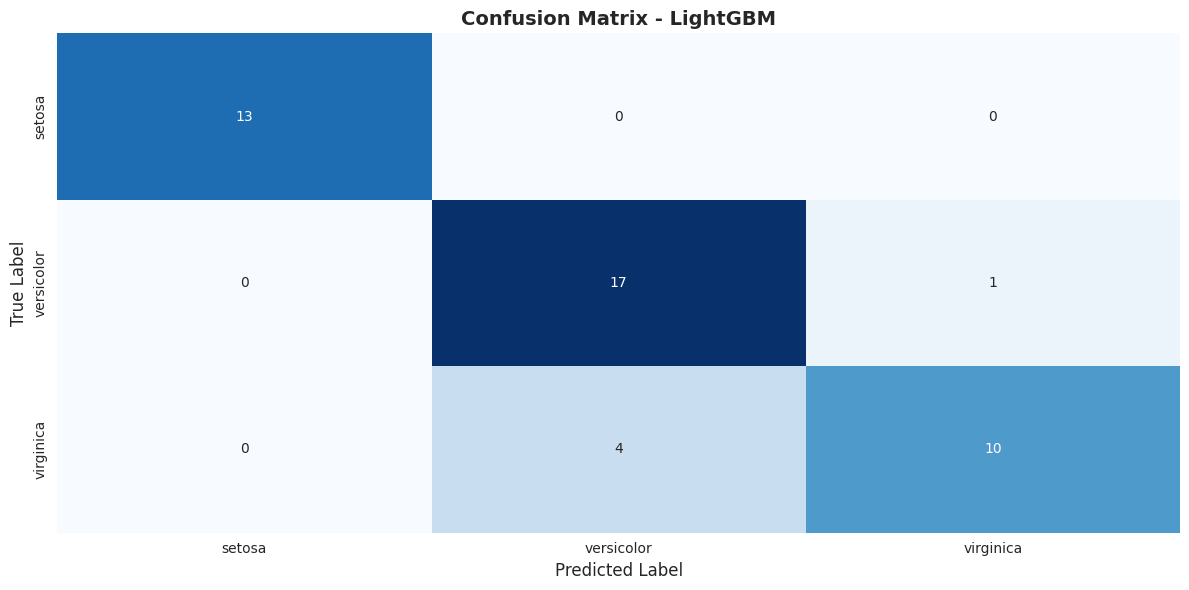

✅ Confusion matrix plotted successfully!


In [ ]:
# Select predictions for the best model
if best_model == 'XGBoost':
    best_pred = xgb_pred
elif best_model == 'LightGBM':
    best_pred = lgb_pred
else:
    best_pred = cat_pred

# Compute confusion matrix
cm = confusion_matrix(y_test, best_pred)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title(f'Confusion Matrix - {best_model}', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("✅ Confusion matrix plotted successfully!")

## 10. Key Takeaways

### What We Learned:

1. **XGBoost**
   - ✅ Most popular gradient boosting library
   - ✅ Great balance of speed and accuracy
   - ✅ Excellent for general purpose use

2. **LightGBM**
   - ✅ Fastest training speed
   - ✅ Low memory usage
   - ✅ Best for large datasets

3. **CatBoost**
   - ✅ Handles categorical features automatically
   - ✅ Often achieves highest accuracy
   - ✅ Robust to hyperparameters

### When to Use Each:

- **Use XGBoost:** General purpose, balanced needs
- **Use LightGBM:** Large datasets (>10K rows), need speed
- **Use CatBoost:** Many categorical features, need highest accuracy

### Important Concepts:

- **n_estimators:** Number of trees (more = better but slower)
- **learning_rate:** Step size (lower = more accurate but needs more trees)
- **max_depth:** Tree complexity (higher = more complex patterns but may overfit)

---

## 11. Homework Assignment

### 📝 Task: Titanic Survival Prediction

**Dataset:** Titanic - Machine Learning from Disaster

**Kaggle Link:** https://www.kaggle.com/c/titanic/data

**Total Points:** 100

---

### Tasks:

**Task 1: Load & Explore Data (20 points)**
- Download `train.csv` from Kaggle
- Load the dataset
- Display first 10 rows
- Check for missing values
- Show survival rate

**Task 2: Preprocess Data (20 points)**
- Select features: Pclass, Sex, Age, SibSp, Parch, Fare
- Handle missing values (fill with median)
- Convert Sex to numeric (Male=1, Female=0)
- Split into train/test (80/20)

**Task 3: Train Models (30 points)**
- Train XGBoost (10 points)
- Train LightGBM (10 points)
- Train CatBoost (10 points)
- Use: n_estimators=100, learning_rate=0.1, max_depth=5

**Task 4: Evaluate (20 points)**
- Calculate accuracy for each model
- Create comparison table
- Print classification report for best model

**Task 5: Visualize (10 points)**
- Create confusion matrix for best model

---

### Submission:

Submit:
1. ✅ This Colab notebook (completed)
2. ✅ 1-page PDF report explaining:
   - Which model performed best and why
   - What you learned
   - Any challenges faced

**Due Date:** Next week's class

---

### Homework Starter Code:

Use the cells below to complete your homework.

In [ ]:
# TASK 1: Load and Explore Data (20 points)

# TODO: Load train.csv
# df = pd.read_csv('train.csv')

# TODO: Display shape

# TODO: Display first 10 rows

# TODO: Check missing values

# TODO: Show survival rate

In [ ]:
# TASK 2: Preprocess Data (20 points)

# TODO: Select features

# TODO: Handle missing values

# TODO: Convert Sex to numeric

# TODO: Split data

In [ ]:
# TASK 3: Train Models (30 points)

# TODO: Train XGBoost

# TODO: Train LightGBM

# TODO: Train CatBoost

In [ ]:
# TASK 4: Evaluate (20 points)

# TODO: Calculate accuracy for each

# TODO: Create comparison table

# TODO: Print classification report

In [ ]:
# TASK 5: Visualize (10 points)

# TODO: Create confusion matrix

---

## 🎉 Class Complete!

**What you learned today:**
- ✅ Three gradient boosting models
- ✅ How to train and compare models
- ✅ When to use each model
- ✅ Real-world dataset application

**Resources:**
- XGBoost Docs: https://xgboost.readthedocs.io/
- LightGBM Docs: https://lightgbm.readthedocs.io/
- CatBoost Docs: https://catboost.ai/docs/

**Good luck with your homework! 🚀**